In [4]:
# Step 2: Import Required Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
IMG_SIZE = (96, 96)
BATCH_SIZE = 32

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Rescaling for test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
# Load train and test datasets
train_generator = train_datagen.flow_from_directory(
    "/kaggle/input/fer2013/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    "/kaggle/input/fer2013/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    class_mode="categorical"
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [23]:
# Number of classes
num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)

Number of classes: 7


In [24]:
# Step 5: InceptionV3 Model Architecture
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [25]:
# Step 6: Model Training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    verbose=1
)

# Step 7: Fine-Tuning
# Unfreeze the last 30 layers for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Recompile the Model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-Tuning
fine_tune_history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 397s 431ms/step - accuracy: 0.2762 - loss: 1.9076 - val_accuracy: 0.3415 - val_loss: 1.6646
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 365s 346ms/step - accuracy: 0.3219 - loss: 1.7009 - val_accuracy: 0.3635 - val_loss: 1.6298
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 328s 353ms/step - accuracy: 0.3184 - loss: 1.6967 - val_accuracy: 0.3689 - val_loss: 1.6122
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 314s 345ms/step - accuracy: 0.3328 - loss: 1.6759 - val_accuracy: 0.3661 - val_loss: 1.6230
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 335s 373ms/step - accuracy: 0.3342 - loss: 1.6667 - val_accuracy: 0.3600 - val_loss: 1.6053
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 310s 345ms/step - accuracy: 0.3319 - loss: 1.6637 - val_accuracy: 0.3525 - val_loss: 1.6098
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 305s 338ms/step - accuracy: 0.3327 - loss: 1.6661 - val_accuracy: 0.3612 - val_loss: 1.6104
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 307s 341ms/step - accuracy: 0.3395 - loss: 1.65

225/225 ━━━━━━━━━━━━━━━━━━━━ 55s 242ms/step - accuracy: 0.4010 - loss: 1.5173
Test Accuracy: 40.00%
225/225 ━━━━━━━━━━━━━━━━━━━━ 55s 245ms/step
              precision    recall  f1-score   support

           0       0.06      0.01      0.02       958
           1       0.00      0.00      0.00       111
           2       0.17      0.05      0.08      1024
           3       0.25      0.46      0.32      1774
           4       0.19      0.18      0.19      1233
           5       0.19      0.19      0.19      1247
           6       0.12      0.15      0.13       831

    accuracy                           0.20      7178
   macro avg       0.14      0.15      0.13      7178
weighted avg       0.17      0.20      0.17      7178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


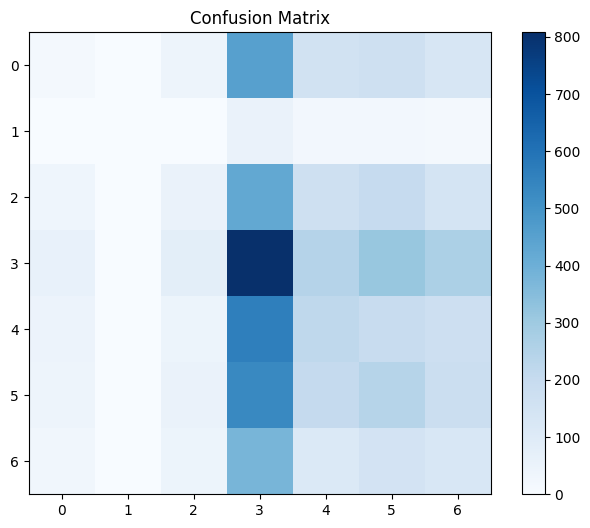

In [28]:
# Step 8: Evaluation
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Classification Report
y_pred = model.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = test_generator.classes

print(classification_report(y_true_labels, y_pred_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

In [31]:
model.save('/kaggle/working/inceptionv3_fer_model.h5')